# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import Dataset

In [2]:
df = pd.read_csv('top-5000-youtube-channels.csv')

# 1. Display all rows except the last 5 rows using head() method

In [3]:
df.head(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4990,"4,991st",B+,Ho Ngoc Ha's Official Channel,208,--,127185704
4991,"4,992nd",B+,Toys to Learn Colors,11,663114,141933264
4992,"4,993rd",B+,КАZКА,25,131766,74304638
4993,"4,994th",B+,United CUBE (CUBE Entertainment…,1055,1586835,371299166


# 2. Display all rows except the first 5 rows using tail() method

In [4]:
df.tail(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


# 3. Shape of Dataframe

In [5]:
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 5000, Columns: 6


# 4. Information about Dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


# 5. Statistics about Dataframe

In [7]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [8]:
df.describe(include='all')

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
count,5000,5000,5000,5000,5000,5000.00
unique,5000,6,4993,2286,4612,NaN
top,1st,B+,Thơ Nguyễn,26,--,NaN
freq,1,2956,2,17,387,NaN
mean,NaN,NaN,NaN,NaN,NaN,1071449400.15
std,NaN,NaN,NaN,NaN,NaN,2003843972.12
min,NaN,NaN,NaN,NaN,NaN,75.00
25%,NaN,NaN,NaN,NaN,NaN,186232945.75
50%,NaN,NaN,NaN,NaN,NaN,482054780.00
75%,NaN,NaN,NaN,NaN,NaN,1124367826.75


# 6. Data cleaning (replace '--' to NaN)

In [9]:
df = df.replace('--', np.nan)

# 7. Check null values

In [10]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    6
Subscribers      0
Video views      0
dtype: int64

In [11]:
per_missing = df.isnull().sum() * 100 / len(df)
per_missing

Rank            0.00
Grade           0.00
Channel name    0.00
Video Uploads   0.12
Subscribers     0.00
Video views     0.00
dtype: float64

<Axes: >

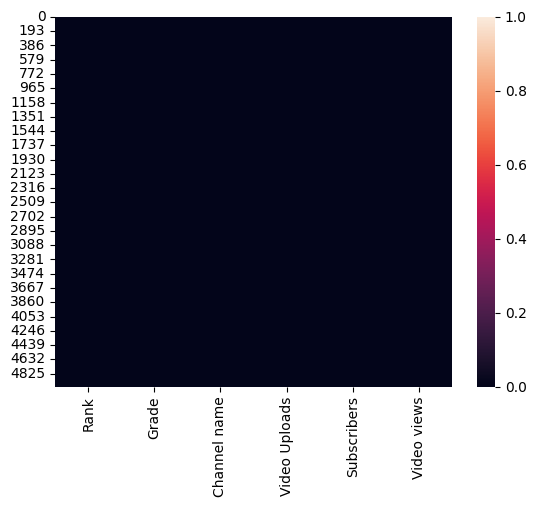

In [12]:
# Heatmap to visualize Null Values
sns.heatmap(df.isnull())

In [13]:
# Drop rows with NaN value(s)
df.dropna(axis=0, inplace=True)

In [14]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

<Axes: >

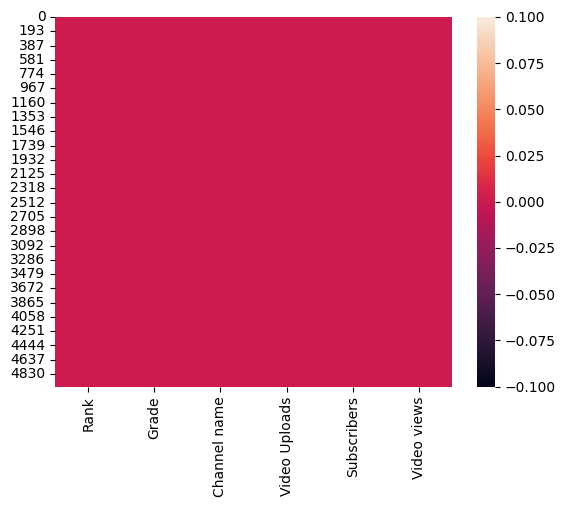

In [15]:
sns.heatmap(df.isnull())

# 8. Data cleaning (Rank Column)

In [16]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [17]:
df['Rank']

0           1st
1           2nd
2           3rd
3           4th
4           5th
         ...   
4995    4,996th
4996    4,997th
4997    4,998th
4998    4,999th
4999    5,000th
Name: Rank, Length: 4994, dtype: object

In [18]:
df['Rank'] = df['Rank'].str[:-2]

In [19]:
df['Rank'] = df['Rank'].str.replace(',', '')

In [20]:
df['Rank'] = df['Rank'].astype(int)

In [21]:
df['Rank'].dtypes

dtype('int32')

# 9. Data Cleaning (Video Uploads & Subscribers)

In [22]:
df['Video Uploads'] = df['Video Uploads'].astype(int)

In [23]:
df['Subscribers'].str.contains('-- ').any()

True

In [24]:
df['Subscribers'].str.contains('-- ').sum()

384

In [25]:
df['Subscribers'] = df['Subscribers'].replace('-- ', 0)

In [26]:
df['Subscribers'] = df['Subscribers'].astype(int)

In [27]:
df.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

# 10. Data Cleaning (Grade Column)

In [28]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [29]:
df['Grade'] = df['Grade'].map({'A++ ':5, 'A+ ':4, 'A ':3, 'A- ':2, 'B+ ':1})

In [30]:
df.dtypes

Rank              int32
Grade             int64
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

# 11. Find Average views for each channel

In [31]:
df['Avg_views'] = df['Video views'] / df['Video Uploads']

In [32]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
0,1,5,Zee TV,82757,18752951,20869786591,252181.53
1,2,5,T-Series,12661,61196302,47548839843,3755535.89
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5,SET India,27323,31180559,22675948293,829921.62
4,5,5,WWE,36756,32852346,26273668433,714813.05


# 12. Find out top five channels with maximum number of video uploads

In [33]:
df.sort_values(by='Video Uploads', ascending=False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
3453,3454,1,AP Archive,422326,746325,548619569,1299.04
1149,1150,2,YTN NEWS,355996,820108,1640347646,4607.77
2223,2224,1,SBS Drama,335521,1418619,1565758044,4666.65
323,324,3,GMA News,269065,2599175,2786949164,10357.90
2956,2957,1,MLB,267649,1434206,1329206392,4966.23


# 13. Find Correlation Matrix

In [34]:
df.corr(numeric_only=True)

,Rank,Grade,Video Uploads,Subscribers,Video views,Avg_views
Rank,1.00,-0.86,-0.07,-0.36,-0.39,-0.15
Grade,-0.86,1.00,0.09,0.41,0.46,0.15
Video Uploads,-0.07,0.09,1.00,0.02,0.09,-0.06
Subscribers,-0.36,0.41,0.02,1.00,0.79,0.29
Video views,-0.39,0.46,0.09,0.79,1.00,0.30
Avg_views,-0.15,0.15,-0.06,0.29,0.30,1.00


# 14. Which Grade has a maximum number of video uploads?

In [35]:
df.groupby('Grade')['Video Uploads'].sum()

Grade
1    8826581
2    4235791
3    5158817
4     678465
5     374507
Name: Video Uploads, dtype: int32

<Axes: xlabel='Grade', ylabel='Video Uploads'>

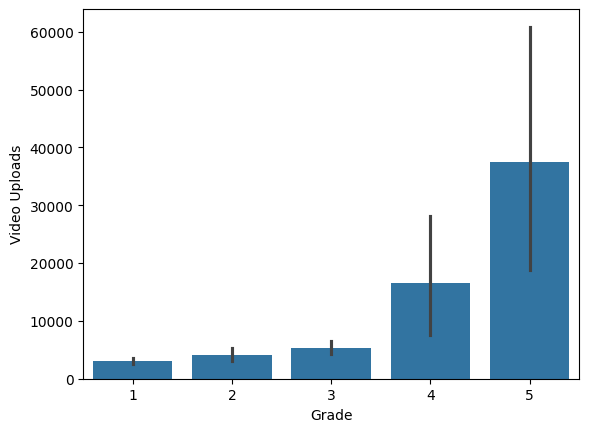

In [36]:
sns.barplot(data=df, x='Grade', y='Video Uploads')

# 15. Which Grade has the highest average views?

In [37]:
df.groupby('Grade')['Avg_views'].sum()

Grade
1   9241364498.49
2   5111093049.55
3   9689719089.59
4    490031789.37
5     56882679.63
Name: Avg_views, dtype: float64

<Axes: xlabel='Grade', ylabel='Avg_views'>

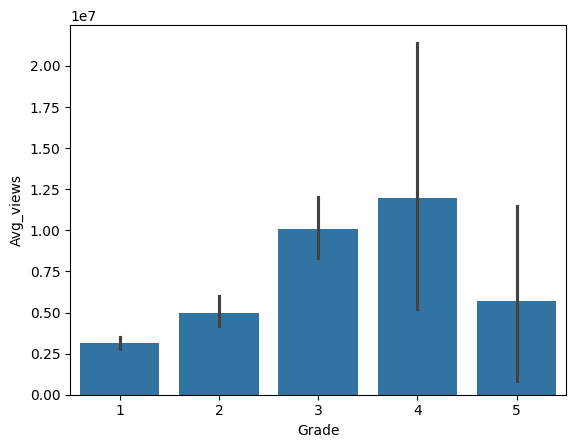

In [38]:
sns.barplot(data=df, x='Grade', y='Avg_views')

# 16. Which Grade has the highest number of Subscribers?

In [39]:
df.groupby('Grade')['Subscribers'].sum()

Grade
1    4178836032
2    2633407673
3    4581101256
4     469077899
5     222817625
Name: Subscribers, dtype: int64

<Axes: xlabel='Grade', ylabel='Subscribers'>

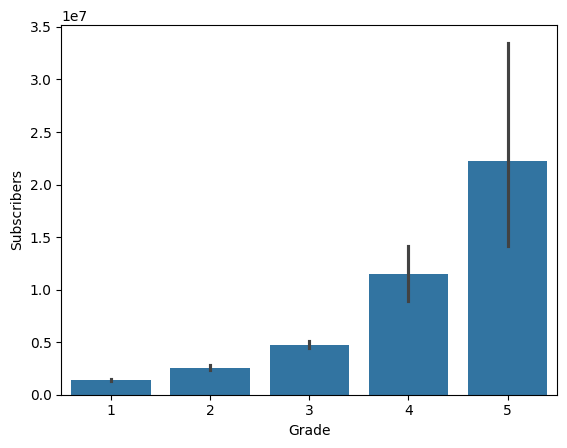

In [40]:
sns.barplot(data=df, x='Grade', y='Subscribers')

# 17. Which Grade has the highest Video Views?

In [41]:
df.groupby('Grade')['Video views'].sum()

Grade
1    1556398001373
2    1066136831368
3    2273948590311
4     248177945463
5     211990911928
Name: Video views, dtype: int64

<Axes: xlabel='Grade', ylabel='Video views'>

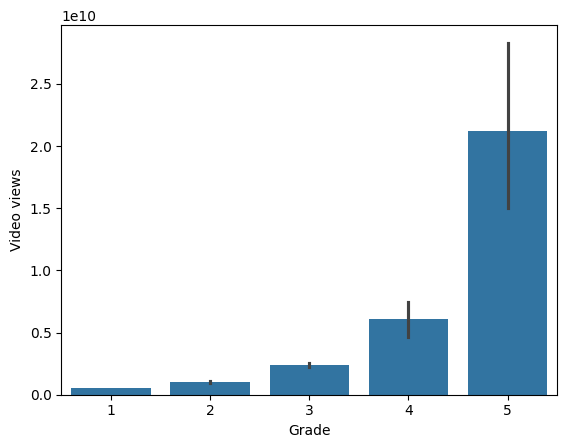

In [42]:
sns.barplot(data=df, x='Grade', y='Video views')